All below follow PD03_processing_cop.ipynb

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
from proj_mod import fill_in_linearly

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_his_index=pd.read_csv("../../processed/his_index_tech_500_stable_14_24.csv")

In [10]:
lst_date_we_care=df_his_index["Date"].to_list()

In [11]:
df_plat=pd.read_csv("../../raw/macro_daily/platinum-prices-historical-chart-data.csv")

In [12]:
df_plat

,date,value
0,1969-01-02,237.5
1,1969-01-03,237.6
2,1969-01-06,237.0
3,1969-01-07,235.0
4,1969-01-08,236.1
...,...,...
14169,2025-04-03,NaN
14170,2025-04-04,NaN
14171,2025-04-05,NaN
14172,2025-04-06,NaN


In [13]:
df_plat_care=df_plat[df_plat["date"].isin(lst_date_we_care)]

In [14]:
df_plat_care

,date,value
11304,2014-01-02,1404.6000
11305,2014-01-03,1414.2000
11306,2014-01-06,1416.4000
11307,2014-01-07,1415.4000
11308,2014-01-08,1414.2000
...,...,...
14050,2024-10-24,1026.1452
14051,2024-10-25,1024.4149
14052,2024-10-28,1033.0996
14053,2024-10-29,1051.2794


In [15]:
lst_missing=list(set(lst_date_we_care)-set(df_plat_care["date"].to_list()))

In [16]:
lst_missing

['2023-11-22', '2023-11-21', '2015-07-13']

In [17]:
df_plat_data=pd.DataFrame({"date": lst_date_we_care})

In [18]:
df_plat_data=df_plat_data.join(df_plat_care.set_index("date"), how="left", on="date")

In [19]:
df_plat_data

,date,value
0,2014-01-02,1404.6000
1,2014-01-03,1414.2000
2,2014-01-06,1416.4000
3,2014-01-07,1415.4000
4,2014-01-08,1414.2000
...,...,...
2563,2024-10-24,1026.1452
2564,2024-10-25,1024.4149
2565,2024-10-28,1033.0996
2566,2024-10-29,1051.2794


In [20]:
df_plat_data[df_plat_data[" value"].isna()]

,date,value
366,2015-07-13,NaN
2331,2023-11-21,NaN
2332,2023-11-22,NaN


In [21]:
df_plat_data["date"]=pd.to_datetime(df_plat_data["date"])

In [22]:
fill_in_linearly.v_datetime(df_plat_data, "date", " value")

,date,value
0,2014-01-02,1404.6000
1,2014-01-03,1414.2000
2,2014-01-06,1416.4000
3,2014-01-07,1415.4000
4,2014-01-08,1414.2000
...,...,...
2563,2024-10-24,1026.1452
2564,2024-10-25,1024.4149
2565,2024-10-28,1033.0996
2566,2024-10-29,1051.2794


In [23]:
df_plat[(df_plat["date"]=="2013-12-31")|(df_plat["date"]=="2014-01-01")]

,date,value
11303,2013-12-31,1373.26


In [24]:
df_plat[df_plat["date"]=="2014-01-02"][" value"]

11304    1404.6
Name:  value, dtype: float64

In [25]:
lst_pro_change=[(np.sqrt(df_plat[df_plat["date"]=="2014-01-02"][" value"].values[0]/df_plat[df_plat["date"]=="2013-12-31"][" value"].values[0])-1)*100]

In [26]:
for index in range(1, 2568): 
    lst_pro_change.append((df_plat_data.loc[index][" value"]/df_plat_data.loc[index-1][" value"]-1)*100)

In [27]:
df_plat_data["pro_change"]=lst_pro_change

In [28]:
df_plat_data

,date,value,pro_change
0,2014-01-02,1404.6000,1.134643
1,2014-01-03,1414.2000,0.683469
2,2014-01-06,1416.4000,0.155565
3,2014-01-07,1415.4000,-0.070602
4,2014-01-08,1414.2000,-0.084782
...,...,...,...
2563,2024-10-24,1026.1452,0.382858
2564,2024-10-25,1024.4149,-0.168621
2565,2024-10-28,1033.0996,0.847772
2566,2024-10-29,1051.2794,1.759734


Now correct 2017-07-06 pro_change

In [29]:
df_plat_data[df_plat_data["date"]=="2017-07-06"]

,date,value,pro_change
737,2017-07-06,910.3,0.598974


In [30]:
df_plat[df_plat["date"]=="2017-07-05"]

,date,value
12185,2017-07-05,908.8


In [31]:
df_plat_data.at[df_plat_data[df_plat_data["date"]=="2017-07-06"].index[0], "pro_change"]=(df_plat_data[df_plat_data["date"]=="2017-07-06"][" value"].values[0]/df_plat[df_plat["date"]=="2017-07-05"][" value"].values[0]-1)*100

In [32]:
df_plat_data[df_plat_data["date"]=="2017-07-06"]

,date,value,pro_change
737,2017-07-06,910.3,0.165053


In [33]:
df_plat_data

,date,value,pro_change
0,2014-01-02,1404.6000,1.134643
1,2014-01-03,1414.2000,0.683469
2,2014-01-06,1416.4000,0.155565
3,2014-01-07,1415.4000,-0.070602
4,2014-01-08,1414.2000,-0.084782
...,...,...,...
2563,2024-10-24,1026.1452,0.382858
2564,2024-10-25,1024.4149,-0.168621
2565,2024-10-28,1033.0996,0.847772
2566,2024-10-29,1051.2794,1.759734


In [34]:
df_plat_data.to_csv("../../processed/plat_daily_we_care.csv")

There are extreme values. Like 2024-10-29. 

In [35]:
df_his_index["Date"]=pd.to_datetime(df_his_index["Date"])

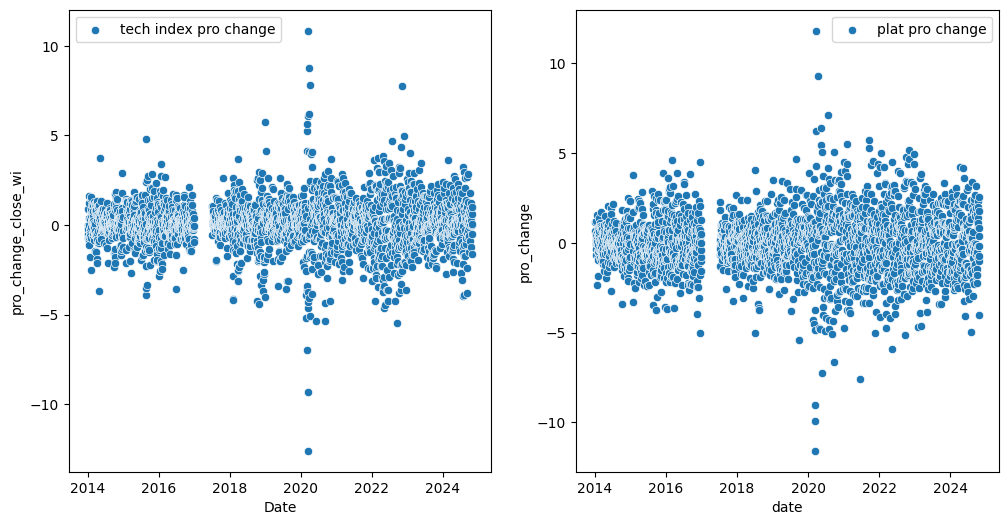

In [36]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.scatterplot(data=df_his_index, x="Date", y="pro_change_close_wi", label="tech index pro change", ax=ax[0])
sns.scatterplot(data=df_plat_data, x="date", y="pro_change",label="plat pro change", ax=ax[1])

# ax[1].set_ylim(-25,25)

plt.show()